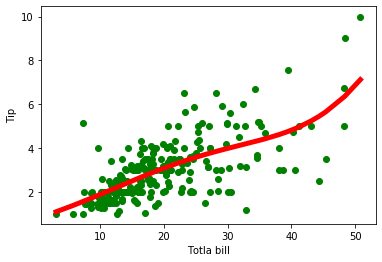

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat,k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point -X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0)
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color='green')
    ax.plot(xsort[:,1],ypred[sortindex],color='red',linewidth=5)
    plt.xlabel("Totla bill")
    plt.ylabel('Tip')
    plt.show()

data = pd.read_csv('10data_tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))
ypred = localWeightRegression(X,mtip,8)
graphPlot(X,ypred)

In [2]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
